# Logistic Regression + PCA
Adult Census Income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df[df == '?'] = np.nan

In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
X = df.drop(['income'], axis=1)

y = df['income']

In [11]:
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [12]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [15]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
22278,56,3,274475,6,5,6,11,4,4,0,0,0,40,38
8950,19,3,237455,11,9,4,5,3,4,0,0,0,25,38
7838,23,3,125491,15,10,4,7,1,1,0,0,0,35,39
16505,37,0,48779,9,13,2,9,0,4,1,0,0,40,38
19140,49,3,423222,12,14,2,11,0,4,1,0,0,50,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,37,5,29054,11,9,2,4,0,4,1,0,0,50,38
26405,26,3,165673,11,9,2,11,0,4,1,0,0,40,38
23236,25,3,156848,15,10,4,9,3,4,1,0,0,40,38
26823,34,3,148226,11,9,4,6,4,2,0,0,0,48,38


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [17]:
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.273263,-0.090641,0.798307,-1.107252,-1.980744,2.255673,1.232533,1.591474,0.392980,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
1,-1.436476,-0.090641,0.448823,0.184396,-0.423425,0.926666,-0.278542,0.968753,0.392980,-1.430470,-0.145189,-0.217407,-1.256397,0.262317
2,-1.143531,-0.090641,-0.608164,1.217715,-0.034095,0.926666,0.225150,-0.276689,-3.141670,-1.430470,-0.145189,-0.217407,-0.444363,0.427425
3,-0.118225,-2.781760,-1.332357,-0.332263,1.133894,-0.402341,0.728841,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,0.760610,-0.090641,2.202540,0.442726,1.523223,-0.402341,1.232533,-0.899410,0.392980,0.699071,-0.145189,-0.217407,0.773687,0.262317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-0.118225,1.703439,-1.518569,0.184396,-0.423425,-0.402341,-0.530388,-0.899410,0.392980,0.699071,-0.145189,-0.217407,0.773687,0.262317
9765,-0.923823,-0.090641,-0.228829,0.184396,-0.423425,-0.402341,1.232533,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
9766,-0.997059,-0.090641,-0.312141,1.217715,-0.034095,0.926666,0.728841,0.968753,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
9767,-0.337933,-0.090641,-0.393536,0.184396,-0.423425,0.926666,-0.026696,1.591474,-1.963453,-1.430470,-0.145189,-0.217407,0.611281,0.262317


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = logreg.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### 14 features Accuracy

In [21]:
acc = accuracy_score(y_test, y_pred)
acc

0.8217831917289384

# Logistic Regression with PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
pca.fit_transform(X_train)

array([[ 1.74453448,  1.44372786, -2.16422698, ..., -0.49169461,
         1.48505183,  0.73865204],
       [-0.62223658, -0.49117863,  0.13352266, ..., -0.38769783,
        -0.33189103, -0.18923337],
       [ 0.64701057,  1.08115659, -0.39157213, ...,  1.03646263,
        -0.66666823, -1.01692683],
       ...,
       [ 0.81413697, -1.67337571,  0.77139075, ...,  0.04683507,
         0.3862579 ,  0.37862524],
       [-1.46535949,  0.93546551, -0.39705611, ..., -0.0545075 ,
         1.02553564,  0.04871497],
       [-0.9935644 , -0.36895764, -0.17597071, ..., -0.46921897,
        -0.22508863, -0.23866049]])

In [24]:
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

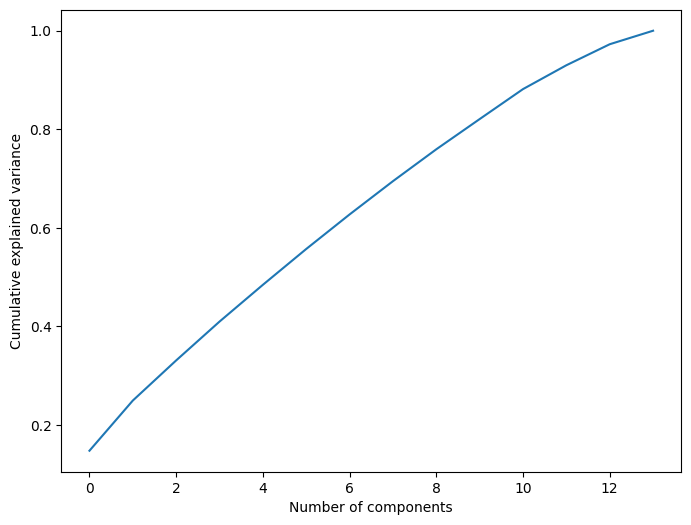

In [25]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [26]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
dim

12

In [27]:
pca = PCA(0.90)
X_pca = pca.fit_transform(X_train)
X_pca.shape

(22792, 12)

In [28]:
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584])

In [29]:
pca.n_components_

12

In [30]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [33]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = logreg.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### 12 features Accuracy

In [36]:
acc = accuracy_score(y_test, y_pred)
acc

0.8227044733340158